In [1]:
#install torchvision and kaggle

!pip install torchvision
!pip install kaggle

In [2]:
# download dataset and extract it

! export KAGGLE_USERNAME=mostafa3m && export KAGGLE_KEY=53fae4218c22bbfa740beb95301e6e16 && kaggle datasets download --unzip paultimothymooney/chest-xray-pneumonia
! ls

100%|███████████████████████████████████████| 2.29G/2.29G [00:22<00:00, 121MB/s]

chest_xray


In [3]:
! pwd && cd chest_xray/chest_xray && ls

/home/wsuser/work
test  train  val


In [4]:
#import  needed libraries and check the used gpu

import torch
from torch import nn
from torch import optim
from torchvision import transforms, models ,datasets
import numpy as np
import matplotlib.pyplot as plt
import random

torch.cuda.get_device_name(0)


'Tesla K80'

In [5]:
#creating the dataloaders 

data_dir = 'chest_xray/chest_xray'

# Define transforms for the training data and testing data

train_transforms = transforms.Compose([transforms.Resize((255,255)),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize((255,255)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


In [6]:
# load data to loaders

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=256)


In [7]:
# choose a pretrained model to start with check optioms here: https://pytorch.org/docs/stable/torchvision/models.html
model = models.densenet121(pretrained=True)

# Freeze parameters of the tarined network 

for param in model.parameters():
    param.requires_grad = False
    
#print the model to check the classifer and change it

print (model)




DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [8]:
# define new classifier and append it to network but remember to have a 2-neuron output layer for our two classes.

# unlock denseblock4.

for param in model.features.denseblock4.parameters():
    param.requires_grad = True  
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.7),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

# choose your loss function

criterion = nn.NLLLoss()

# define optimizer to train only the classifier

optimizer = optim.Adam([{'params':model.features.denseblock4.parameters()},{'params':model.classifier.parameters()}], lr=0.00005)

#print the network now
print(model)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [9]:
#Define number of epochs through data and run the training loop

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
epochs = 5
steps = 0
running_loss = 0
print_every = 5
trainlossarr=[]
testlossarr=[]
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [10]:
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs=inputs.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()

        props = model.forward(inputs)
        loss = criterion(props, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    props = model.forward(inputs)
                    batch_loss = criterion(props, labels)

                    test_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(props)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            trainlossarr.append(running_loss/print_every)
            testlossarr.append(test_loss/len(testloader))
#             plt.plot(trainlossarr, 'b')
#             plt.plot(testlossarr, 'r')
#             plt.show()
            running_loss = 0
            model.train()
        


Epoch 1/5.. Train loss: 0.633.. Test loss: 0.620.. Test accuracy: 0.695
Epoch 1/5.. Train loss: 0.542.. Test loss: 0.607.. Test accuracy: 0.695
Epoch 1/5.. Train loss: 0.521.. Test loss: 0.593.. Test accuracy: 0.695
Epoch 1/5.. Train loss: 0.468.. Test loss: 0.557.. Test accuracy: 0.695
Epoch 2/5.. Train loss: 0.408.. Test loss: 0.513.. Test accuracy: 0.695
Epoch 2/5.. Train loss: 0.374.. Test loss: 0.466.. Test accuracy: 0.703
Epoch 2/5.. Train loss: 0.317.. Test loss: 0.424.. Test accuracy: 0.737
Epoch 2/5.. Train loss: 0.286.. Test loss: 0.393.. Test accuracy: 0.777
Epoch 3/5.. Train loss: 0.262.. Test loss: 0.366.. Test accuracy: 0.811
Epoch 3/5.. Train loss: 0.236.. Test loss: 0.347.. Test accuracy: 0.833
Epoch 3/5.. Train loss: 0.193.. Test loss: 0.335.. Test accuracy: 0.842
Epoch 3/5.. Train loss: 0.172.. Test loss: 0.324.. Test accuracy: 0.850
Epoch 4/5.. Train loss: 0.163.. Test loss: 0.315.. Test accuracy: 0.857
Epoch 4/5.. Train loss: 0.140.. Test loss: 0.310.. Test accuracy

image number 327
---------------------
label: PNEUMONIA
prediction: PNEUMONIA


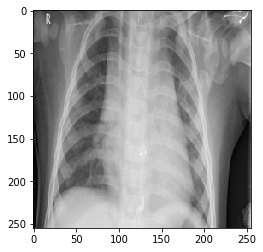

In [15]:
### try your model on some images
%matplotlib inline
model.eval()
testloader = torch.utils.data.DataLoader(test_data, batch_size=624)
classes={0:"Normal",1:"PNEUMONIA"}
images , labels=next( iter(testloader) )

index = random.randint(0, 623)
test_img=images[index]
plt.imshow(test_img.numpy()[0], cmap='gray')

test_img=test_img.unsqueeze(0).cuda()

res = torch.exp(model(test_img))
print(f"image number {index}")
print("---------------------")

print("label:",classes[labels[index].item()])
print("prediction:", classes[res.argmax().item()])

